## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
# Load the data
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
# Check the shape of the DataFrame (rows, columns)
diabetes_data.shape

(768, 9)

In [4]:
# Check the data types of each column
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# Check the unique value counts
diabetes_data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

**<font color='teal'> Apply the describe function to the data.</font>**

In [6]:
# Check the summary statistics of the DataFrame
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [7]:
# Replace the 0 values with NaN
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [8]:
# Count the number of NaN values in each column
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

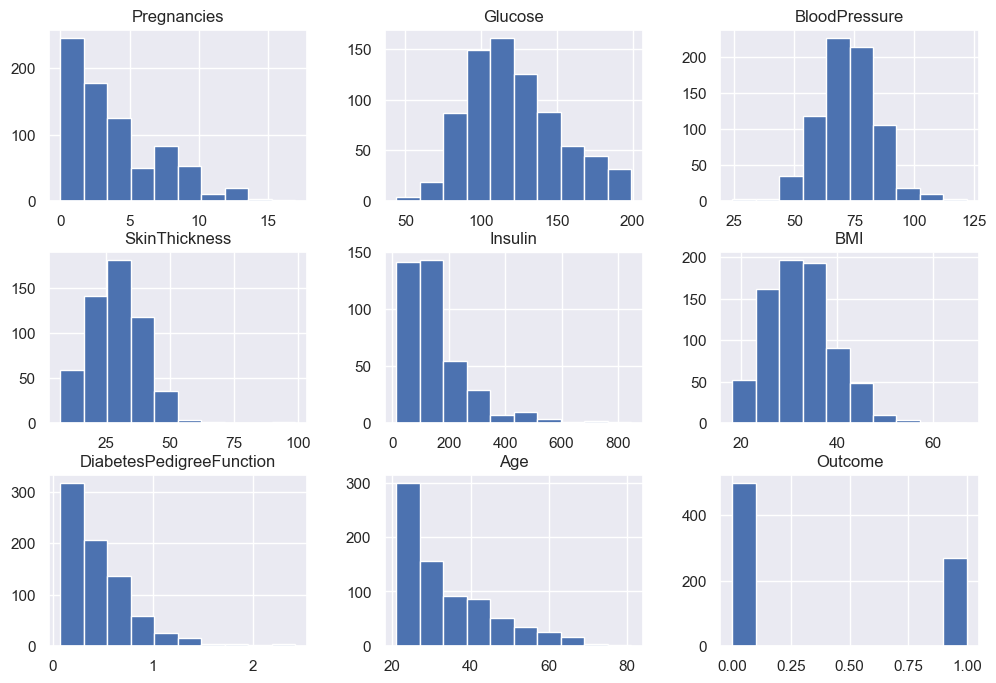

In [9]:
# Plot histograms of each column
diabetes_data.hist(figsize=(12, 8))
plt.show()

#### Replace the zeros with mean and median values.

In [10]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

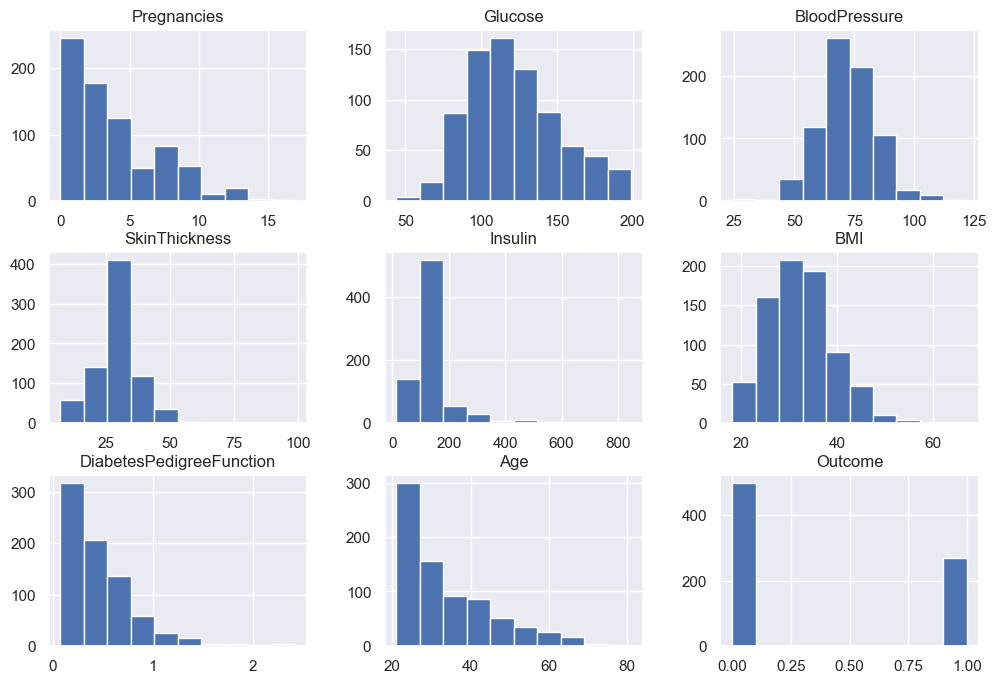

In [11]:
# Plot histograms of each column
diabetes_data.hist(figsize=(12, 8))
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


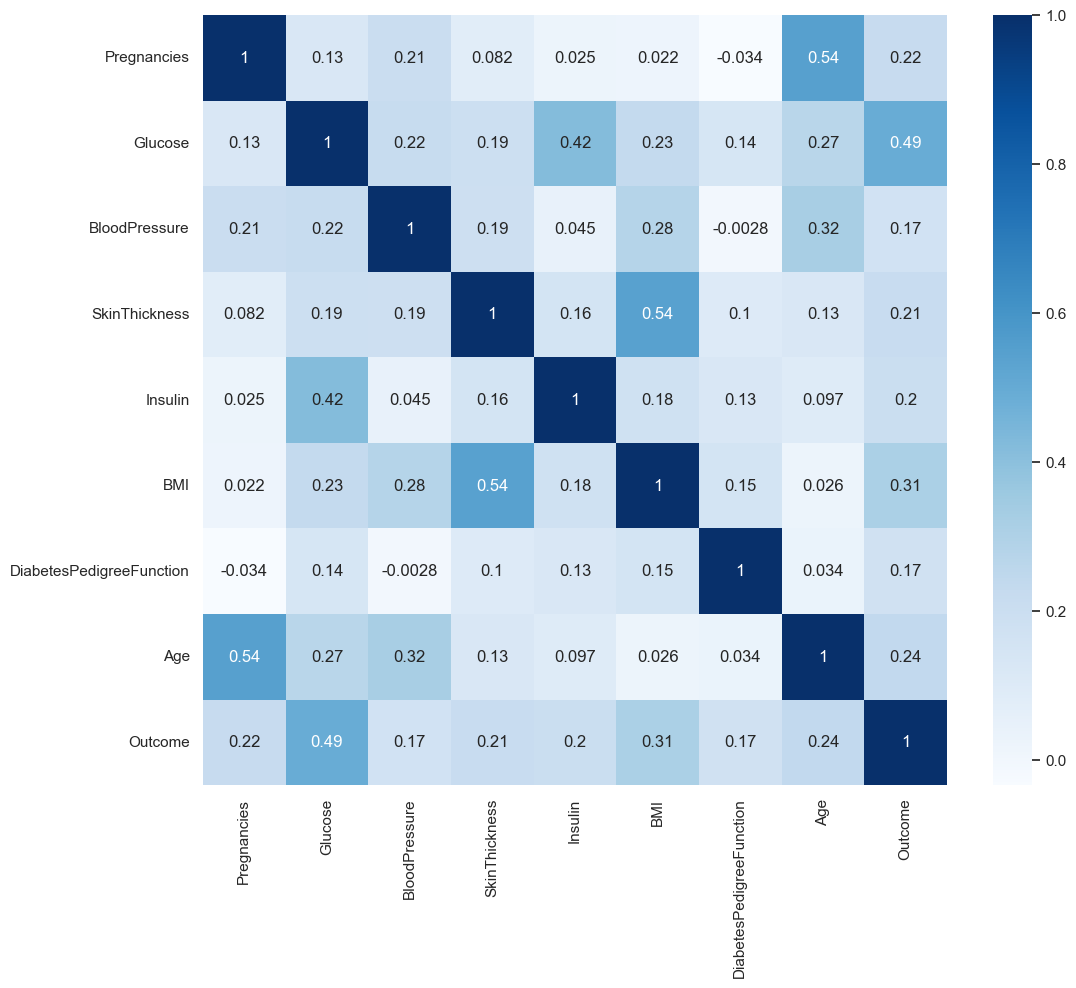

In [12]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [13]:
# Define y variable (target) as the Outcome column
y = diabetes_data['Outcome']

# Define X variable (features) as the remaining data
X = diabetes_data.drop(columns = ['Outcome'])

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [14]:
# Train test split (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, y, test_size=0.3, random_state=random_seed_number, stratify=y)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [15]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [17]:
# Print train and test scores
print('Train scores: \n', train_scores)
print('Test scores: \n', test_scores)

Train scores: 
 [1.0, 0.9981378026070763, 0.9962756052141527, 0.9962756052141527, 0.9962756052141527, 0.9962756052141527, 0.9925512104283054, 0.9925512104283054, 0.9925512104283054]
Test scores: 
 [1.0, 1.0, 0.987012987012987, 0.9956709956709957, 0.9956709956709957, 0.9956709956709957, 0.9956709956709957, 0.9956709956709957, 0.9956709956709957]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
knn = KNeighborsClassifier()

# Define the grid of values for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

# GridSearchCV object
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# Fit it to the training data and find the optimal parameters
knn_gscv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Best parameters: {}".format(knn_gscv.best_params_))
print("Best score: {}".format(knn_gscv.best_score_))

Best parameters: {'n_neighbors': 3}
Best score: 0.9944444444444445


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [19]:
# Fit it to the test data and find the optimal parameters
knn_gscv.fit(X_test, y_test)

# Print the optimal parameters and best score
print("Best parameters: {}".format(knn_gscv.best_params_))
print("Best score: {}".format(knn_gscv.best_score_))

Best parameters: {'n_neighbors': 3}
Best score: 1.0


Plot the train and test model performance by number of neighbors.

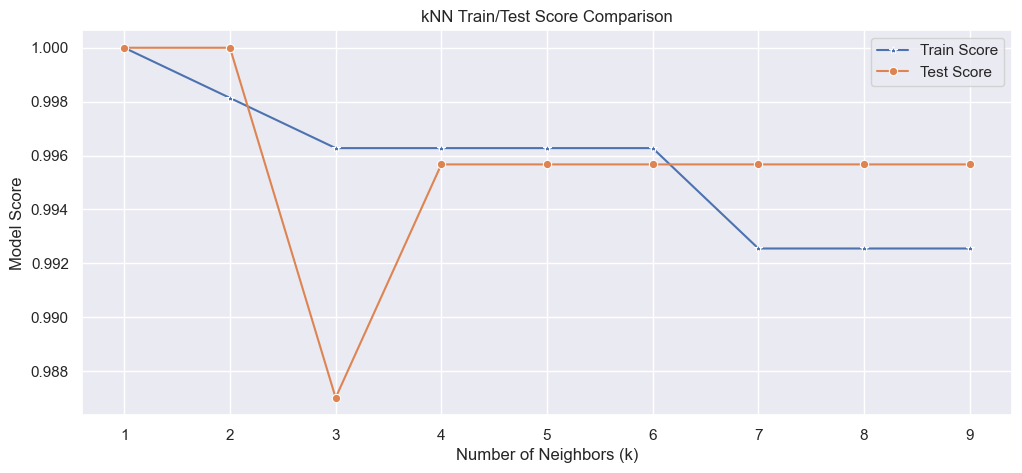

In [20]:
plt.figure(figsize=(12,5))
sns.lineplot(x=range(1,10), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,10), y=test_scores, marker='o', label='Test Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Model Score')
plt.title('kNN Train/Test Score Comparison')
plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [21]:
# Fit and score the best number of neighbors based on the plot.
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9956709956709957

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

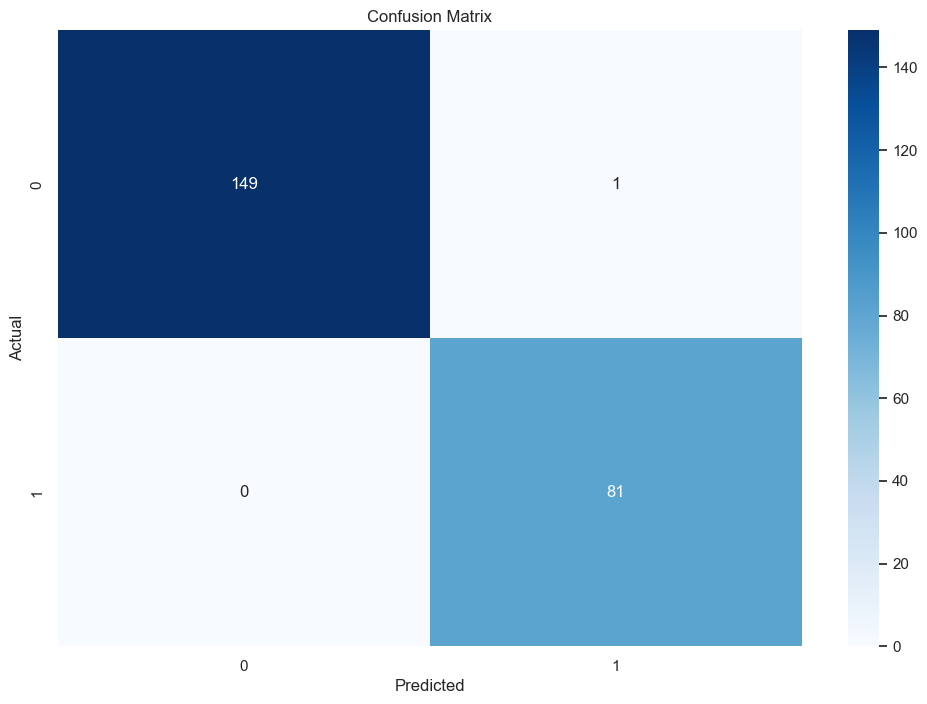

In [23]:
# plot confusion matrix heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pl, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [24]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.99      1.00      0.99        81

    accuracy                           1.00       231
   macro avg       0.99      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [26]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [27]:
#  Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
rf = RandomForestClassifier()

# Define the grid of values for n_neighbors
param_grid = {'n_estimators': np.arange(1, 25)}

# GridSearchCV object
rf_gscv = GridSearchCV(rf, param_grid, cv=5)

# Fit it to the training data and find the optimal parameters
rf_gscv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Best parameters: {}".format(rf_gscv.best_params_))
print("Best score: {}".format(rf_gscv.best_score_))

# Fit it to the test data and find the optimal parameters
rf_gscv.fit(X_test, y_test)

# Print the optimal parameters and best score
print("Best parameters: {}".format(rf_gscv.best_params_))
print("Best score: {}".format(rf_gscv.best_score_))

Best parameters: {'n_estimators': 3}
Best score: 1.0
Best parameters: {'n_estimators': 3}
Best score: 1.0


In [28]:
# Fit and score the best number of neighbors based on the plot.
rf = RandomForestClassifier(n_estimators=24)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [29]:
# Create a confusion matrix heatmap
y_pred = rf.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

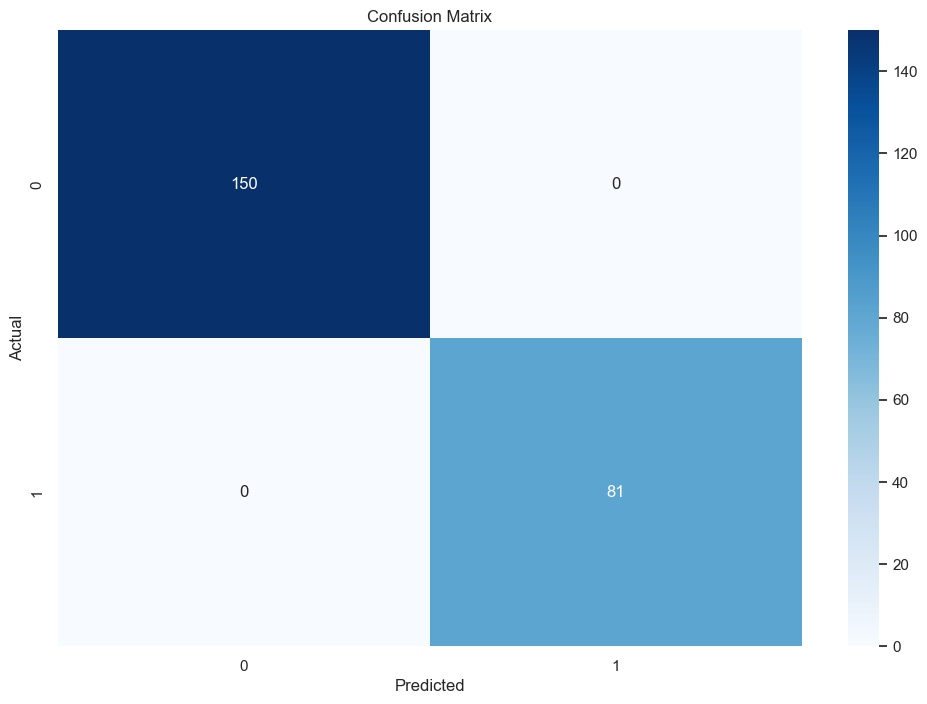

In [30]:
# plot confusion matrix heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pl, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [31]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        81

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231

